# Overview over strategy performance

In [5]:
import os
import sys
sys.path.insert(0,'../utils')
#from df_utils import *
from run_strategies import *
import pandas as pd
import numpy as np
import ast
import json
import os
#from df_utils import *
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import gym
import gym_furniture

In [6]:
env= gym.make('SmallFurniture-v0')


array([52., 49., 26., 30., 23., 26.])

In [28]:

def red_cost_benefit(env, profits, furniture_items= [0,1,2,3]):
    restr = np.zeros((6, 4))
    # get most restrictive resource for each furniture item
    for f in furniture_items:
        if env.is_feasible(f):
            print([env.state[r]/env.costs[f,r] if env.costs[f, r] >0 else 100 for r in range(6)])
            restr[np.argmin([env.state[r]/env.costs[f,r] if env.costs[f, r] >0 else 100 for r in range(6)]), f] +=1
            
    return restr

m = 9            
env.reset(m)            
red_cost_benefit(env, env.rewards_month[:,m])

[13.0, 14.666666666666666, 100, 100, 7.666666666666667, 6.5]
[10.4, 6.285714285714286, 100, 100, 4.6, 8.666666666666666]
[26.0, 8.8, 6.5, 5.0, 100, 100]
[13.0, 44.0, 6.5, 30.0, 100, 100]


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [24]:

global_greedy_rewards, global_greedy_actions, global_greedy_states = strategy_run(env)
grouped_greedy_rewards,grouped_greedy_actions, grouped_greedy_states  = strategy_run(env, strategy = 'grouped greedy', first_group = 1)
material_balancing_rewards, material_balancing_actions, material_balancing_states = strategy_run(env, strategy = 'material balancing')
greedy_material_balancing_rewards, greedy_material_balancing_actions, greedy_material_balancing_states = strategy_run(env, strategy = 'greedy material balancing')
greedy_then_material_balancing_rewards, greedy_then_material_balancing_actions, greedy_then_material_balancing_states = strategy_run(env,strategy = 'greedy, then material balancing')
minimize_min_rewards, minimize_min_actions, minimize_min_states = strategy_run(env,strategy = 'minimize_min')
gr_minimize_min_rewards, gr_minimize_min_actions, gr_minimize_min_states = strategy_run(env,strategy = 'greedy_minimize_min')
cost_benefit_rewards, cost_benefit_actions, cost_benefit_states = strategy_run(env,strategy = 'cost_benefit')


global_greedy_rewards
#[env.optimal_solution( month) for month in range(env.months)]
get_diff(material_balancing_rewards)

[-9.999999999999998,
 0.0,
 -2.4390243902439046,
 -8.333333333333337,
 -2.985074626865669,
 -8.333333333333337,
 -6.818181818181824,
 -4.081632653061229,
 -4.918032786885251,
 -22.22222222222222,
 -3.2258064516129004,
 -8.92857142857143]

(1.0, 12.0)

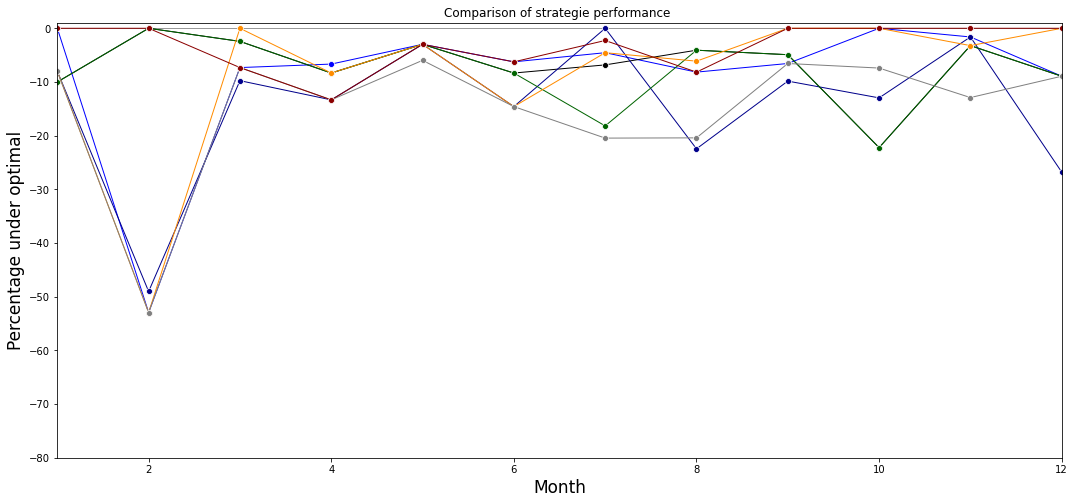

In [4]:
fig = plt.figure(figsize=(18, 8))
plt.title('Comparison of strategie performance ')

#fig.axhline(0, color = 'gray')
sns.lineplot(x=list(range(1,13)),y=np.zeros(12), linewidth = 0.8, color = 'gray')




line1 = sns.lineplot(x=list(range(1,13)),y=get_diff(global_greedy_rewards),   
                     linewidth = 1,  marker = "o", color = 'blue')
line2 = sns.lineplot(x=list(range(1,13)),y=get_diff(material_balancing_rewards),   
                     linewidth = 1,  marker = "o", color = 'black')
line3 = sns.lineplot(x=list(range(1,13)),y=get_diff(grouped_greedy_rewards),   
                     linewidth = 1,  marker = "o", color = 'darkblue')
line4 = sns.lineplot(x=list(range(1,13)),y=get_diff(greedy_material_balancing_rewards),   
                     linewidth = 1,  marker = "o", color = 'darkgreen')
line5 = sns.lineplot(x=list(range(1,13)),y=get_diff(greedy_then_material_balancing_rewards),   
                     linewidth = 1,  marker = "o", color = 'darkorange')
line6 = sns.lineplot(x=list(range(1,13)),y=get_diff(minimize_min_rewards),   
                     linewidth = 1,  marker = "o", color = 'grey')
line7 = sns.lineplot(x=list(range(1,13)),y=get_diff(cost_benefit_rewards),   
                     linewidth = 1,  marker = "o", color = 'darkred')

xlabel = plt.xlabel('Month', fontsize = 17)
ylabel = plt.ylabel('Percentage under optimal', fontsize = 17)
fig.savefig('Images/strategies/difference_to_optimal_strategies.jpg',bbox_inches='tight')

plt.ylim([-80,1])
plt.xlim([1, 12])

In [5]:

strategy_dict = {'global greedy':global_greedy_actions,
                 'grouped greedy': grouped_greedy_actions,
                 'material balancing':material_balancing_actions,
                 'greedy material balancing':greedy_material_balancing_actions,
                 'greedy, then material balancing': greedy_then_material_balancing_actions,
                 'minimize_min':minimize_min_actions,
                 'greedy_minimize_min': gr_minimize_min_actions,
                'cost_benefit': cost_benefit_actions}

df_list = [strategy_traj(v, strat_type = k) for k,v in strategy_dict.items()]
df_trajs = pd.concat(df_list)


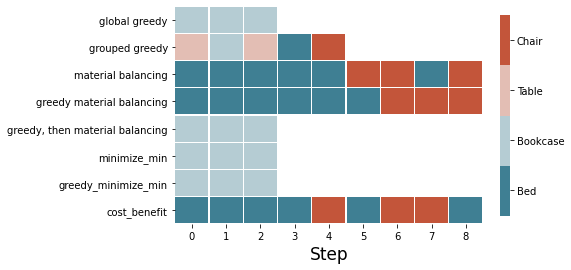

In [6]:
m =1
colormap = sns.diverging_palette(220, 20, n=4)

df_month = pd.DataFrame([strategy_dict[k][m] for k,v in strategy_dict.items()])
g= sns.heatmap(data = df_month , 
                    cmap = colormap, yticklabels=strategy_dict.keys(), cbar_kws = dict(use_gridspec=False,location="right", fraction = 0.03),
                    annot = False, linewidths=0.2)
g.set_facecolor('xkcd:white')
colorbar = g.collections[0].colorbar
#g.set_yticklabels(g.get_yticklabels(),rotation =0)

#colorbar = fig.colorbar(g)
r = colorbar.vmax - colorbar.vmin
colorbar.set_ticks([colorbar.vmin + 0.5 * r / (4) + r * i / (4) for i in range(4)])
colorbar.set_ticklabels(['Bed', 'Bookcase', 'Table', 'Chair'])
#plt.title('Trajectories for month ' + str(m) + ', cluster ' + str(c), fontsize = 25, pad = 20)
xlabel = plt.xlabel('Step', fontsize = 17)

# Similiarity strategy to strategy

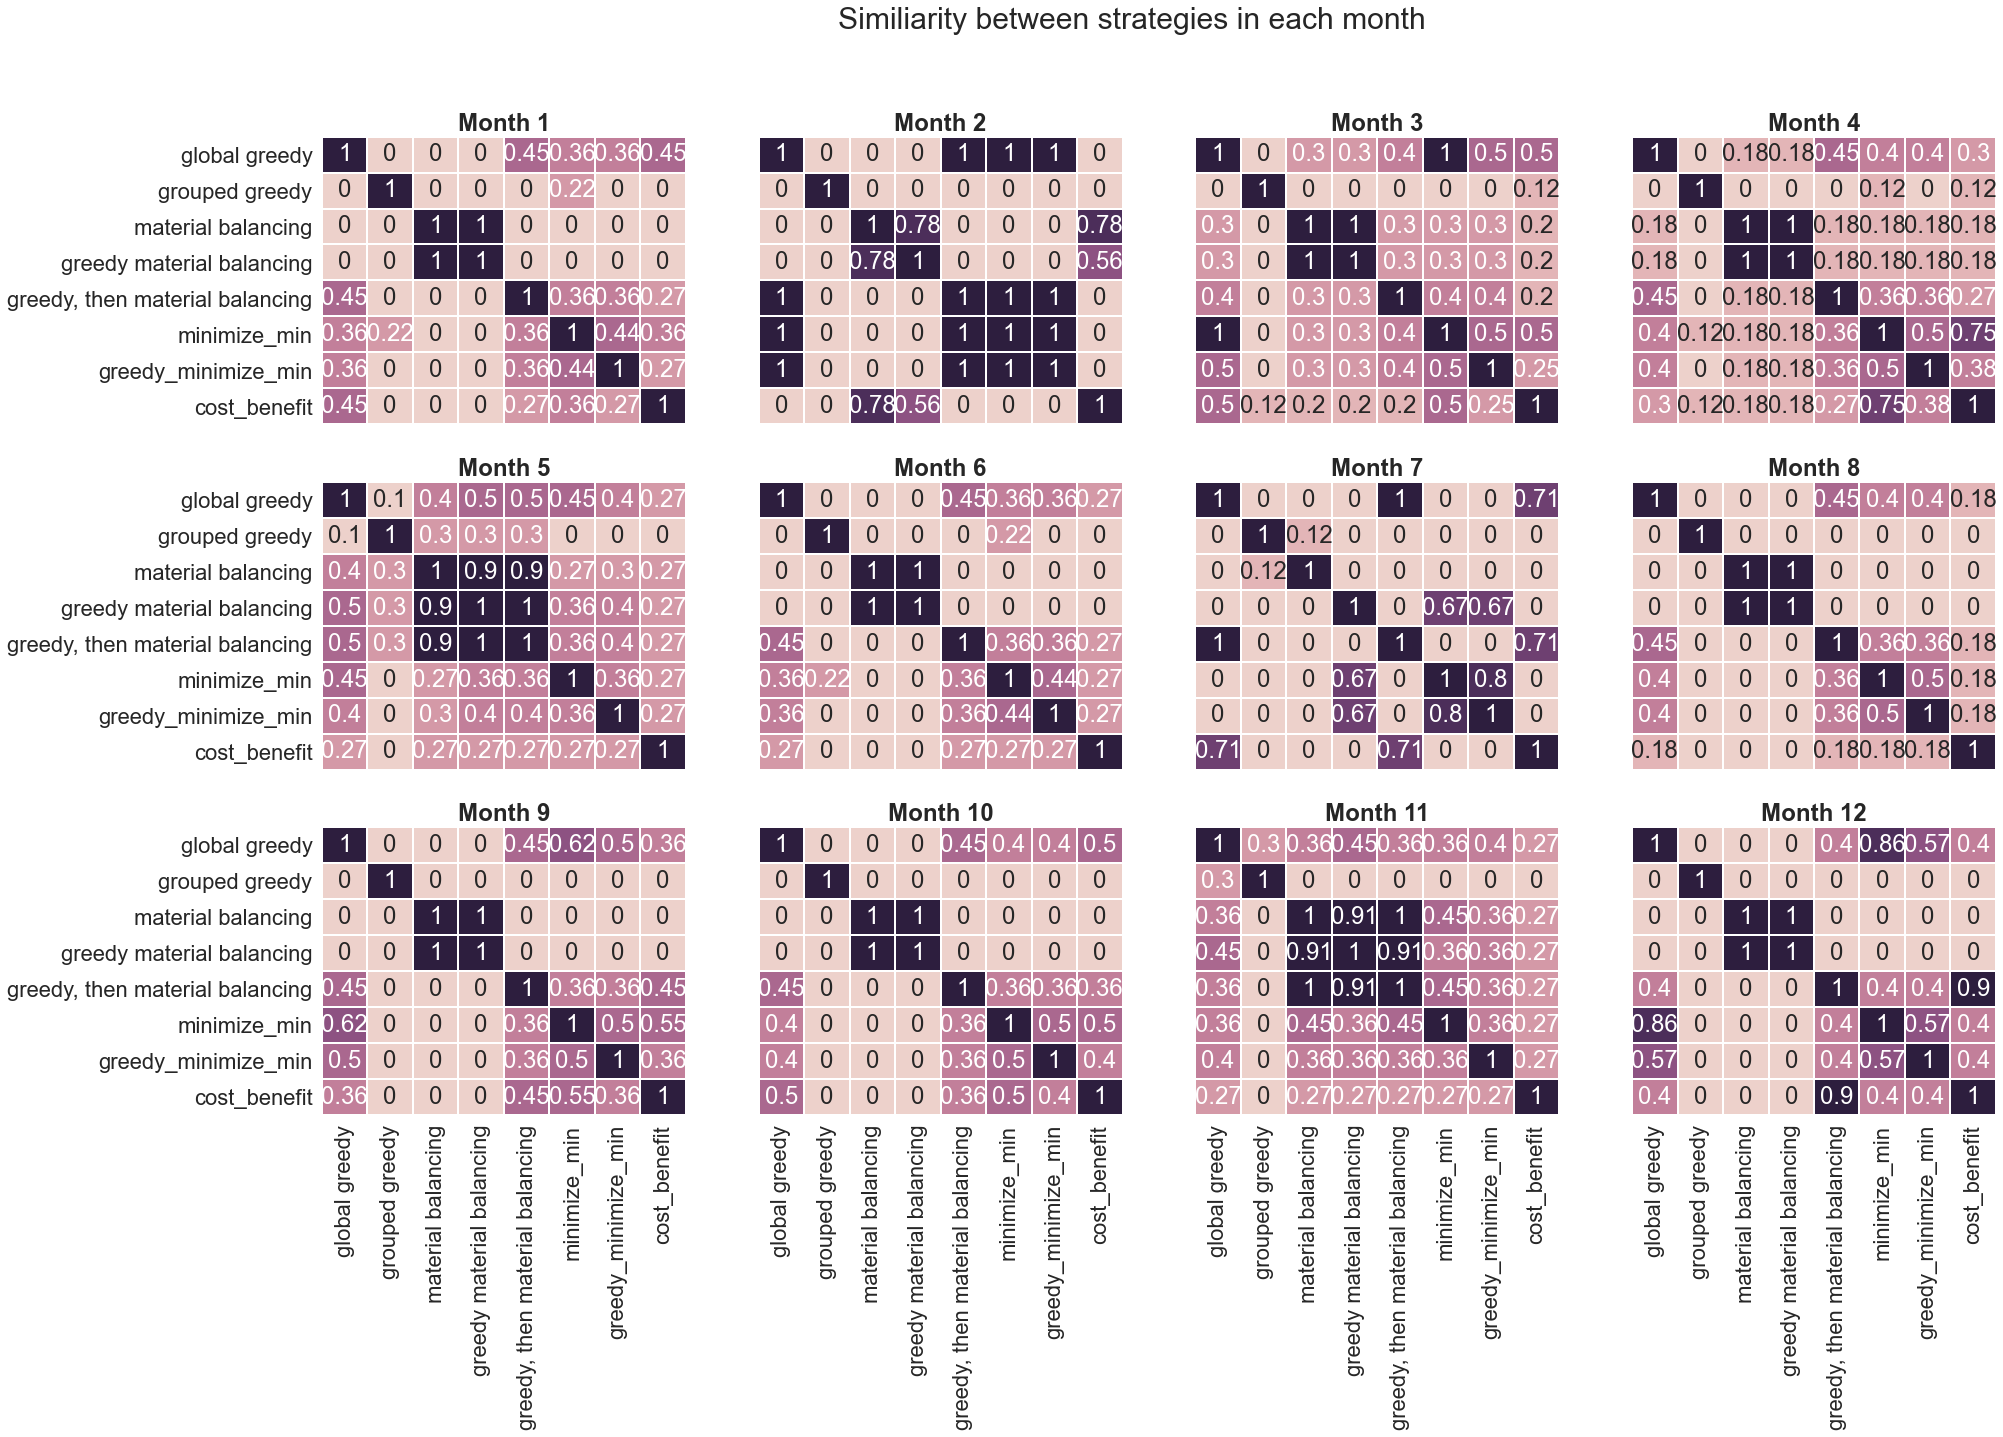

In [7]:
sns.set(font_scale=2, style = 'white', palette = 'deep') 
m = 12
fig, axes = plt.subplots(3, 4, figsize=(30, 18), sharex=True, sharey = True)
fig.suptitle('Similiarity between strategies in each month', fontsize = 30)

c= 0
j = 0
plt.tick_params(axis = 'x',labelrotation=45)
for m in range(1,13):
    sim_mat = pd.DataFrame(index = list(strategy_dict.keys()), columns =list(strategy_dict.keys()))
    for idx in sim_mat.index:
        for col in sim_mat.columns:
            s1 = df_trajs[(df_trajs.strategy == idx) &(df_trajs.month == m)].solutions[1:]
            s2 = df_trajs[(df_trajs.strategy == col) &(df_trajs.month == m)].solutions[1:]

            sim_mat.loc[sim_mat.index==idx,col] = strategy_similiarity(s1, s2)
    colormap =  sns.cubehelix_palette(n_colors=9, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse = False)

    sns.heatmap(data = sim_mat.astype(float),#
                            cmap = colormap, 
                            annot = True, linewidths=1, ax = axes[j,c],cbar = False,)
    axes[j,c].set_title('Month ' + str(m), fontweight='bold')
    if c < 3:
        c+=1
    elif c == 3:
        c= 0
        j +=1
  

fig.savefig('Images/strategies/similiarity_between_strategies.jpg',bbox_inches='tight')

In [8]:
env= gym.make('SmallFurniture-v0')
m = 7
stat = env.reset(m)
print(env.costs)
print(env.state)
rank =  []
for f in range(4):    
    #rank.append([env.costs[f, r]/env.state[r] if env.state[r] >0 else 0 for r in range(6)])

    rank.append(round(sum([env.costs[f, r]/env.state[r] if env.state[r] >0 else 0 for r in range(6)]),2))
print(env.rewards_month[:,m])
rank

[[4. 3. 0. 0. 3. 4.]
 [5. 7. 0. 0. 5. 3.]
 [2. 5. 4. 6. 0. 0.]
 [4. 1. 4. 1. 0. 0.]]
[49. 44. 26. 30. 23. 26.]
[5. 7. 3. 2.]


[0.43, 0.59, 0.51, 0.29]

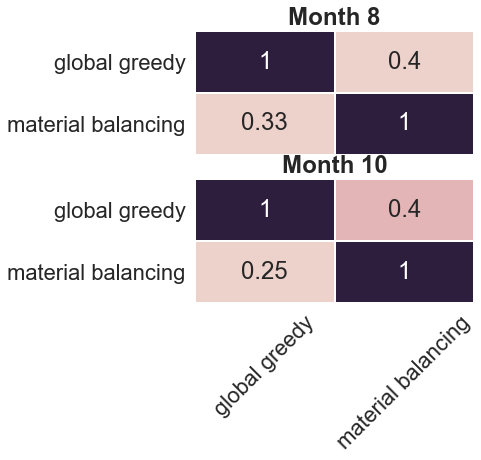

In [9]:
sns.set(font_scale=2, style = 'white', palette = 'deep') 
m = 12
fig, axes = plt.subplots(2, 1, figsize=(5, 5), sharex=True, sharey = True)
#fig.suptitle('Similiarity between strategies in each month', fontsize = 30)

c= 0
j = 0
plt.tick_params(axis = 'x',labelrotation=45)
for m in [8,10]:
    sim_mat = pd.DataFrame(index =  ['global greedy', 'material balancing'], columns = ['global greedy', 'material balancing'])
    for idx in sim_mat.index:
        for col in sim_mat.columns:
            
            s1 = df_trajs[(df_trajs.strategy == idx) &(df_trajs.month == m)].solutions[1:]
            s2 = df_trajs[(df_trajs.strategy == col) &(df_trajs.month == m)].solutions[1:]
            sim_mat.loc[sim_mat.index==idx,col] = strategy_similiarity_state(env, strategy_dict[idx][m-1], m, strategy=col)
    colormap =  sns.cubehelix_palette(n_colors=9, start=0, rot=0.4, gamma=1.0, hue=0.8, light=0.85, dark=0.15, reverse = False)

    sns.heatmap(data = sim_mat.astype(float),#mask = mask,
                            cmap = colormap,  
                            annot = True, linewidths=1, ax = axes[j],cbar = False,)
    axes[j].set_title('Month ' + str(m), fontweight='bold')
    j+=1
  

# fig.savefig('Images/strategy_analysis/similiarity_between_strategies.jpg',bbox_inches='tight')